[[[0.32156863 0.43921569 0.23529412]
  [0.42352941 0.54117647 0.3372549 ]
  [0.40392157 0.52156863 0.3254902 ]
  ...
  [0.35686275 0.47843137 0.20392157]
  [0.35294118 0.47843137 0.19215686]
  [0.40784314 0.53333333 0.24705882]]

 [[0.25882353 0.37647059 0.17254902]
  [0.28627451 0.40392157 0.20784314]
  [0.27843137 0.39607843 0.2       ]
  ...
  [0.36470588 0.48627451 0.21960784]
  [0.33333333 0.45490196 0.18039216]
  [0.36470588 0.49019608 0.20392157]]

 [[0.2745098  0.39215686 0.18823529]
  [0.23529412 0.35294118 0.15686275]
  [0.15294118 0.26666667 0.07843137]
  ...
  [0.34509804 0.46666667 0.20392157]
  [0.33333333 0.45490196 0.18823529]
  [0.37647059 0.49803922 0.23137255]]

 ...

 [[0.34901961 0.36470588 0.26666667]
  [0.34509804 0.36862745 0.26666667]
  [0.43921569 0.45882353 0.36862745]
  ...
  [0.54117647 0.57254902 0.49019608]
  [0.5372549  0.55686275 0.47843137]
  [0.51372549 0.53333333 0.45490196]]

 [[0.25098039 0.26666667 0.16078431]
  [0.37647059 0.39215686 0.28627451]


[[[1.         1.         0.98431373]
  [0.98431373 0.98823529 0.96862745]
  [0.99607843 1.         0.99215686]
  ...
  [1.         0.99607843 1.        ]
  [0.99607843 0.98431373 1.        ]
  [1.         0.99215686 1.        ]]

 [[0.98431373 0.98823529 0.96862745]
  [1.         1.         0.98431373]
  [0.99607843 1.         0.98431373]
  ...
  [0.96862745 0.96470588 0.98431373]
  [1.         0.99215686 1.        ]
  [0.96862745 0.95686275 0.99215686]]

 [[1.         1.         0.99215686]
  [0.97647059 0.98431373 0.97254902]
  [0.99607843 1.         0.98431373]
  ...
  [0.99607843 0.99607843 1.        ]
  [0.92941176 0.9254902  0.94901961]
  [1.         0.99607843 1.        ]]

 ...

 [[1.         0.98431373 1.        ]
  [0.99607843 0.98823529 1.        ]
  [1.         1.         0.95294118]
  ...
  [1.         1.         0.94509804]
  [0.98039216 0.95686275 0.95686275]
  [1.         0.98039216 1.        ]]

 [[1.         0.98039216 1.        ]
  [1.         0.99607843 1.        ]


  [0.82352941 0.83137255 0.77647059]]]
[[[0.96862745 0.96862745 1.        ]
  [0.99215686 0.99607843 1.        ]
  [0.99607843 0.99215686 1.        ]
  ...
  [0.98431373 1.         0.99607843]
  [0.98823529 1.         1.        ]
  [0.94117647 0.96470588 0.95686275]]

 [[0.99607843 0.99607843 1.        ]
  [0.97647059 0.98039216 1.        ]
  [0.97254902 0.96862745 0.98823529]
  ...
  [0.98039216 0.99607843 0.99215686]
  [0.91764706 0.93333333 0.92941176]
  [0.98823529 1.         1.        ]]

 [[0.95294118 0.94901961 0.98039216]
  [0.96862745 0.96470588 0.99607843]
  [0.96470588 0.96862745 0.98823529]
  ...
  [0.98039216 1.         0.98431373]
  [0.94901961 0.95686275 0.95294118]
  [0.99607843 1.         1.        ]]

 ...

 [[0.91372549 0.94901961 0.9372549 ]
  [0.90196078 0.94509804 0.92941176]
  [0.8745098  0.92156863 0.90588235]
  ...
  [0.87058824 0.90588235 0.94117647]
  [0.8627451  0.89019608 0.92941176]
  [0.85098039 0.86666667 0.91372549]]

 [[0.91764706 0.95686275 0.91372549

  [0.0627451  0.18039216 0.04705882]]]
[[[0.25490196 0.21176471 0.14117647]
  [0.2627451  0.22745098 0.16078431]
  [0.23137255 0.19215686 0.14509804]
  ...
  [0.3372549  0.37254902 0.25098039]
  [0.3254902  0.37254902 0.23137255]
  [0.36470588 0.41176471 0.2627451 ]]

 [[0.20392157 0.15686275 0.10196078]
  [0.22352941 0.17647059 0.12941176]
  [0.19215686 0.15294118 0.11372549]
  ...
  [0.31372549 0.34901961 0.22745098]
  [0.30980392 0.35686275 0.21568627]
  [0.30588235 0.35294118 0.20392157]]

 [[0.22745098 0.16862745 0.14117647]
  [0.24313725 0.19215686 0.16078431]
  [0.21568627 0.17254902 0.14901961]
  ...
  [0.43921569 0.4745098  0.35294118]
  [0.3372549  0.38431373 0.24313725]
  [0.22745098 0.2745098  0.1254902 ]]

 ...

 [[0.50196078 0.41176471 0.44313725]
  [0.54117647 0.45882353 0.47843137]
  [0.58431373 0.50588235 0.51372549]
  ...
  [0.22352941 0.16078431 0.16470588]
  [0.2745098  0.21176471 0.22352941]
  [0.34117647 0.27843137 0.29019608]]

 [[0.58039216 0.47843137 0.52156863

  [0.52156863 0.41960784 0.36078431]]]
[[[0.19607843 0.24313725 0.20392157]
  [0.14901961 0.19607843 0.15686275]
  [0.19215686 0.24313725 0.20392157]
  ...
  [0.09411765 0.13333333 0.09019608]
  [0.09411765 0.13333333 0.09803922]
  [0.14509804 0.17254902 0.14117647]]

 [[0.15686275 0.20392157 0.14901961]
  [0.21176471 0.25882353 0.20392157]
  [0.26666667 0.32156863 0.2627451 ]
  ...
  [0.11372549 0.15294118 0.10980392]
  [0.04705882 0.08627451 0.05098039]
  [0.17647059 0.21568627 0.18039216]]

 [[0.25490196 0.30588235 0.22745098]
  [0.34117647 0.4        0.31764706]
  [0.38823529 0.45882353 0.37254902]
  ...
  [0.07843137 0.1254902  0.08627451]
  [0.06666667 0.10588235 0.07058824]
  [0.31764706 0.35686275 0.32156863]]

 ...

 [[0.10588235 0.15294118 0.0745098 ]
  [0.10588235 0.14901961 0.08627451]
  [0.1254902  0.17254902 0.1254902 ]
  ...
  [0.14117647 0.16470588 0.1254902 ]
  [0.20784314 0.21960784 0.18431373]
  [0.24705882 0.25882353 0.22352941]]

 [[0.03921569 0.0745098  0.00784314

Train on 205 samples, validate on 13 samples
Epoch 1/60
205/205 [==============================] - 1s 5ms/sample - loss: 0.8277 - sparse_categorical_accuracy: 0.6000 - val_loss: 0.8846 - val_sparse_categorical_accuracy: 0.5385
Epoch 2/60
205/205 [==============================] - 0s 424us/sample - loss: 0.6960 - sparse_categorical_accuracy: 0.6293 - val_loss: 1.1024 - val_sparse_categorical_accuracy: 0.4615
Epoch 3/60
205/205 [==============================] - 0s 507us/sample - loss: 0.8295 - sparse_categorical_accuracy: 0.5902 - val_loss: 0.9296 - val_sparse_categorical_accuracy: 0.4615
Epoch 4/60
205/205 [==============================] - 0s 2ms/sample - loss: 0.6769 - sparse_categorical_accuracy: 0.6098 - val_loss: 0.7948 - val_sparse_categorical_accuracy: 0.6154
Epoch 5/60
205/205 [==============================] - 0s 444us/sample - loss: 0.6075 - sparse_categorical_accuracy: 0.6878 - val_loss: 0.8297 - val_sparse_categorical_accuracy: 0.6154
Epoch 6/60
205/205 [===================

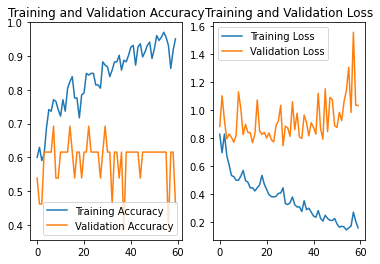

In [9]:
import tensorflow as tf
from PIL import Image
import numpy as np
import os
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model
import json

train_path = 'resize/melonjson/train32/'
train_txt = 'resize/melonjson/train.txt'
test_path = 'resize/melonjson/test32/'
test_txt = 'resize/melonjson/test.txt'

def generateds(path, txt):
    f = open(txt, 'r')  # 以只读形式打开txt文件
    contents = f.readlines()  # 读取文件中所有行
    f.close()  # 关闭txt文件
    x, y_ = [], []  # 建立空列表
    for content in contents:  # 逐行取出
        value = content.split()  # 以空格分开，图片路径为value[0] , 标签为value[1] , 存入列表
        img_path = path + value[0]  # 拼出图片路径和文件名
        img = Image.open(img_path)  # 读入图片
        img = np.array(img.convert('RGB'))  # 图片变为8位宽灰度值的np.array格式
        img = img / 255.  # 数据归一化 （实现预处理）
        x.append(img)  # 归一化后的数据，贴到列表x
        y_.append(value[1])  # 标签贴到列表y_

    x = np.array(x)  # 变为np.array格式
    y_ = np.array(y_)  # 变为np.array格式
    y_ = y_.astype(np.int64)  # 变为64位整型
    return x, y_  # 返回输入特征x，返回标签y_

x_train, y_train = generateds(train_path, train_txt)
x_test, y_test = generateds(test_path, test_txt)

##################网络结构##################
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32,3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = "checkpoint/CBaseLine.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(x_train, y_train, batch_size=16, epochs=60, validation_data=(x_test, y_test), validation_freq=1,callbacks=[cp_callback])

##########################################

checkpoint_save_path = "checkpoint/CBaseLine.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print('-------------load the model-----------------')
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)
model.summary()

# print(model.trainable_variables)
file = open('Cweights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
file.close()

model.save('baseline.h5')
print("save")

###############################################    show   ###############################################

# 显示训练集和验证集的acc和loss曲线
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
# $ tensorflowjs_converter --input_format=keras baseline.h5 tfjs_baseline
